# SALES ANALYSIS FROM KAGGLE CHALLENGE

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing csv file**

In [2]:
df = pd.read_csv('sales_data_sample.csv')


**Reading file**

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Perform the EDA**

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df.index

RangeIndex(start=0, stop=2823, step=1)

In [8]:
df[df.columns[:]]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


**Total sales made from 2003-2005**

In [9]:
df['QUANTITYORDERED'].sum()

99067

**Total sales made in 2004** 

In [10]:
df[df["YEAR_ID"]==2004]["QUANTITYORDERED"].sum()

46824

**List of each product**

In [11]:
df['PRODUCTLINE'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

**Line chart of sales by month**

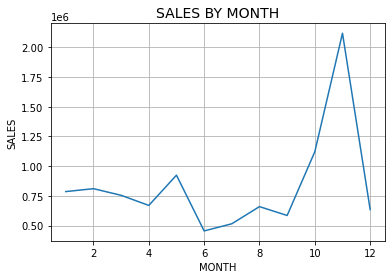

In [12]:
aa = df.groupby(df["MONTH_ID"]).sum()
aa

plt.plot(range(1,13), aa["SALES"])

plt.title('SALES BY MONTH', fontsize=14)
plt.xlabel('MONTH')
plt.ylabel('SALES')
plt.grid(True)

**Top 5 countries by Revenue**

In [13]:
top_sales = pd.DataFrame(df.groupby('COUNTRY').sum()['SALES'])

top_sales.sort_values(by=['SALES'], inplace=True, ascending=False)

Result = top_sales.head(5)

Result

,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46


**Top 10 customers by Revenue**

In [14]:
top_cus = pd.DataFrame(df.groupby('CUSTOMERNAME').sum()['SALES'])

top_cus.sort_values(by=['SALES'], inplace=True, ascending=False)

Result = top_cus.head(10)

Result

,SALES
CUSTOMERNAME,
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06
"Australian Collectors, Co.",200995.41
Muscle Machine Inc,197736.94
La Rochelle Gifts,180124.90
"Dragon Souveniers, Ltd.",172989.68
Land of Toys Inc.,164069.44
The Sharp Gifts Warehouse,160010.27
"AV Stores, Co.",157807.81


**Show the QUANTITYORDERED by STATUS using a bar chart**

<AxesSubplot:xlabel='STATUS', ylabel='QUANTITYORDERED'>

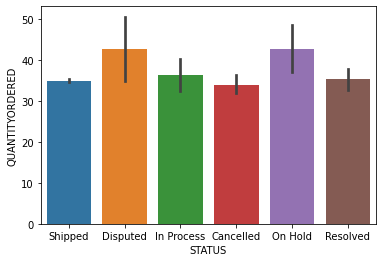

In [15]:
sns.barplot(x='STATUS',y='QUANTITYORDERED',data=df)

**Top 15 customers who made the highest number of orders**

In [16]:
top_cust = pd.DataFrame(df.groupby('CUSTOMERNAME').sum()['QUANTITYORDERED'])

top_cust.sort_values(by=['QUANTITYORDERED'], inplace=True, ascending=False)

top_customer = top_cust.head(15)

top_customer

,QUANTITYORDERED
CUSTOMERNAME,
Euro Shopping Channel,9327
Mini Gifts Distributors Ltd.,6366
"Australian Collectors, Co.",1926
La Rochelle Gifts,1832
"AV Stores, Co.",1778
Muscle Machine Inc,1775
The Sharp Gifts Warehouse,1656
Rovelli Gifts,1650
Land of Toys Inc.,1631


**Creating a pairplot**

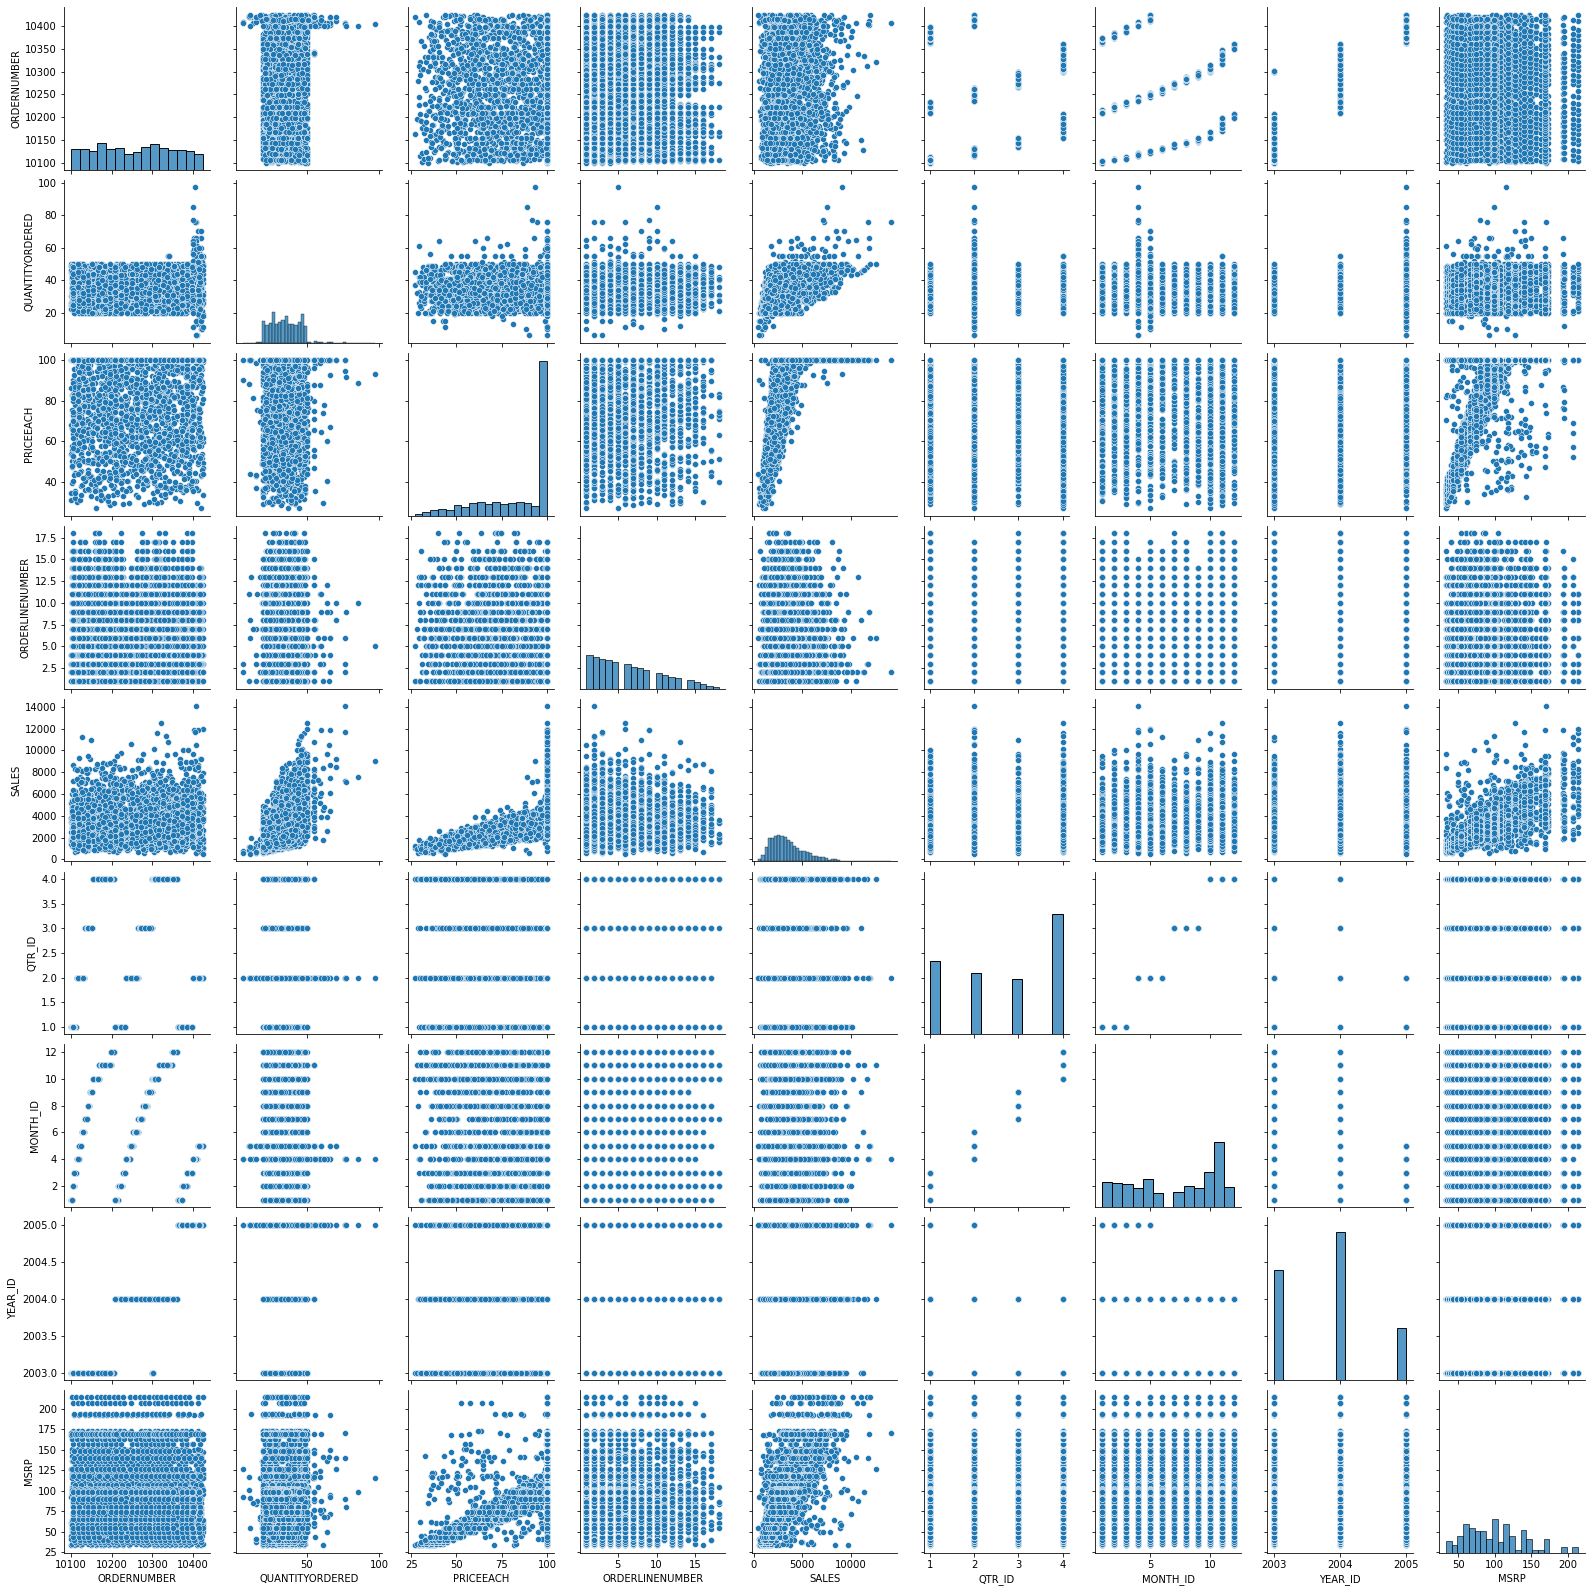

In [17]:
sns.pairplot(df)

**A box plot showing SALES by PRODUCTLINE**

<AxesSubplot:xlabel='PRODUCTLINE', ylabel='SALES'>

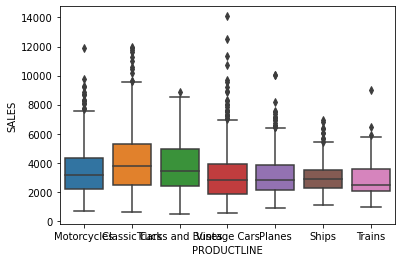

In [18]:
sns.boxplot(x='PRODUCTLINE',y='SALES',data=df)